### **This notebook is for practicing KNN on Breast Cancer dataset**

- After Applying logistiv=c regression algorithm on breaste cancer dataset, I'm going to apply KNN algorithm on the same dataset
- Let's compare the results of this with logistic regression

In [1]:
import numpy as np
import pandas as pd 
from sklearn.datasets import load_breast_cancer

In [2]:
data= load_breast_cancer()
X= pd.DataFrame(data.data, columns=data.feature_names)
y= pd.Series(data.target)

In [3]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train_Scaled= scaler.fit_transform(X_train)
X_test_Scaled= scaler.fit_transform(X_test)

In [6]:
from sklearn.neighbors import KNeighborsClassifier
knn=  KNeighborsClassifier(n_neighbors= 5)
knn.fit(X_train_Scaled, y_train)

KNeighborsClassifier()

In [7]:
y_pred= knn.predict(X_test_Scaled)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
print("classification_report:", classification_report(y_test, y_pred))

Accuracy:  0.956140350877193
Confusion Matrix:  [[40  3]
 [ 2 69]]
classification_report:               precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



- So, let's find the best K

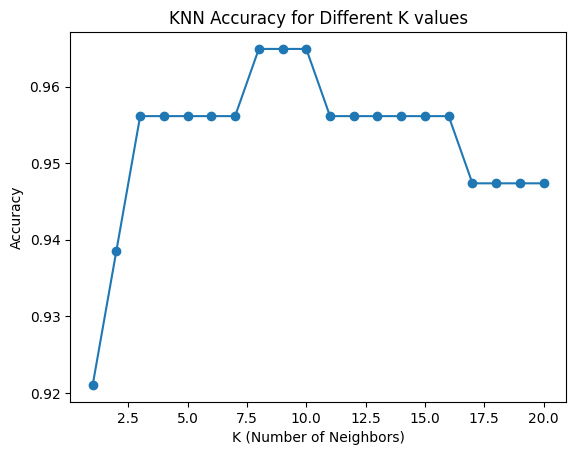

In [10]:
import matplotlib.pyplot as plt

accuracy_scores = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_Scaled, y_train)
    y_pred = knn.predict(X_test_Scaled)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

plt.plot(range(1, 21), accuracy_scores, marker='o')
plt.xlabel("K (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy for Different K values")
plt.show()